In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date

In [2]:
# 1. Örnek Log Veri Seti Oluşturma
# Log dosyası simülasyonu
log_data = {
    'timestamp': ['2024-09-15 10:15:32', '2024-09-15 10:20:35', '2024-09-15 10:25:37',
                  '2024-09-15 11:15:32', '2024-09-15 11:20:35', '2024-09-15 12:25:37',
                  '2024-09-16 13:30:50', '2024-09-16 14:05:32', '2024-09-16 15:12:12',
                  '2024-09-16 15:18:45', '2024-09-16 16:25:37', '2024-09-17 08:30:12',
                  '2024-09-17 09:12:22', '2024-09-17 11:32:15', '2024-09-17 12:15:20'],
    'event_type': ['INFO', 'ERROR', 'WARNING', 'INFO', 'ERROR', 'INFO',
                  'WARNING', 'ERROR', 'INFO', 'ERROR', 'WARNING', 'INFO',
                  'ERROR', 'INFO', 'ERROR'],
    'message': ['System boot', 'Unauthorized access', 'Disk usage high', 'User login',
                'Memory leak detected', 'Scheduled backup', 'CPU temperature high',
                'Unauthorized access', 'Network issue detected', 'Disk failure',
                'Memory overload', 'Service restart', 'Unauthorized access', 'System shutdown', 'Memory leak detected'],
    'severity': [1, 5, 3, 1, 4, 1, 3, 5, 2, 5, 4, 1, 5, 1, 4]
}

In [3]:

# Verileri pandas DataFrame'e çeviriyoruz
df = pd.DataFrame(log_data)

# Zaman damgası sütununu datetime formatına çevir
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:

# 2. Log Verilerini İnceleme
print("Veri Setinin Genel Görünümü:")
print(df.head())


Veri Setinin Genel Görünümü:
            timestamp event_type               message  severity
0 2024-09-15 10:15:32       INFO           System boot         1
1 2024-09-15 10:20:35      ERROR   Unauthorized access         5
2 2024-09-15 10:25:37    WARNING       Disk usage high         3
3 2024-09-15 11:15:32       INFO            User login         1
4 2024-09-15 11:20:35      ERROR  Memory leak detected         4


In [5]:
# 3. Temel İstatistikler
# Olay türlerinin dağılımını kontrol etme
event_type_counts = df['event_type'].value_counts()
print("\nOlay Türlerinin Dağılımı:")
print(event_type_counts)



Olay Türlerinin Dağılımı:
event_type
INFO       6
ERROR      6
WARNING    3
Name: count, dtype: int64


C:\Users\EXCALIBUR\AppData\Local\Temp\ipykernel_1948\3359526519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['timestamp'].dt.hour, data=df, palette='viridis')


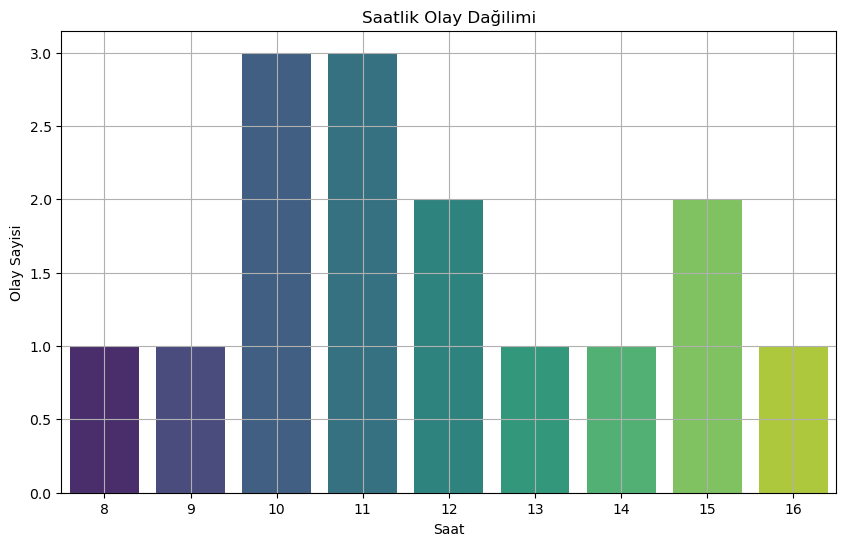

In [6]:
# 4. Zaman Serisi Analizi - Saat Bazında Olayların Dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x=df['timestamp'].dt.hour, data=df, palette='viridis')
plt.title('Saatlik Olay Dağilimi')
plt.xlabel('Saat')
plt.ylabel('Olay Sayisi')
plt.grid(True)
plt.show()


C:\Users\EXCALIBUR\AppData\Local\Temp\ipykernel_1948\2561014084.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='event_type', data=df, palette='Set2')


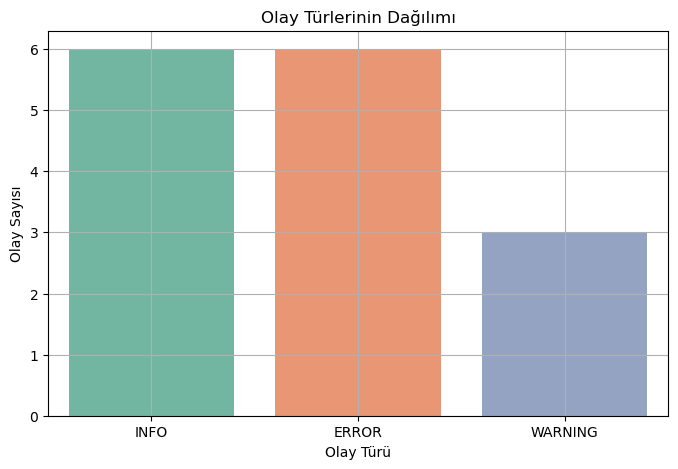

In [7]:
# 5. Olay Türlerine Göre Dağılım
plt.figure(figsize=(8, 5))
sns.countplot(x='event_type', data=df, palette='Set2')
plt.title('Olay Türlerinin Dağılımı')
plt.xlabel('Olay Türü')
plt.ylabel('Olay Sayısı')
plt.grid(True)
plt.show()


In [8]:
# 6. Zaman Serisi Üzerinde Anormallik Tespiti
# Saatlik olarak olayların yoğunluğu
df['hour'] = df['timestamp'].dt.hour
hourly_event_counts = df.groupby('hour').size()

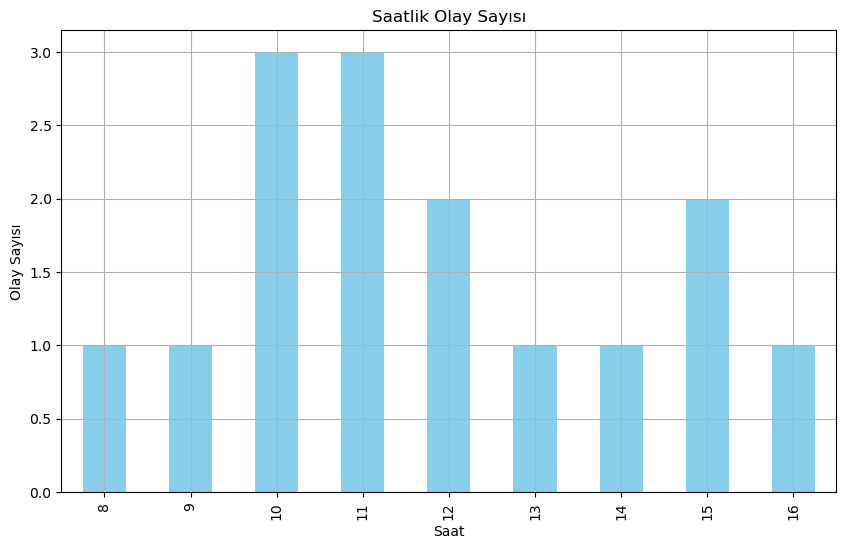

In [9]:
plt.figure(figsize=(10, 6))
hourly_event_counts.plot(kind='bar', color='skyblue')
plt.title('Saatlik Olay Sayısı')
plt.xlabel('Saat')
plt.ylabel('Olay Sayısı')
plt.grid(True)
plt.show()


C:\Users\EXCALIBUR\AppData\Local\Temp\ipykernel_1948\1755221748.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='event_type', y='severity', data=df, palette='coolwarm')


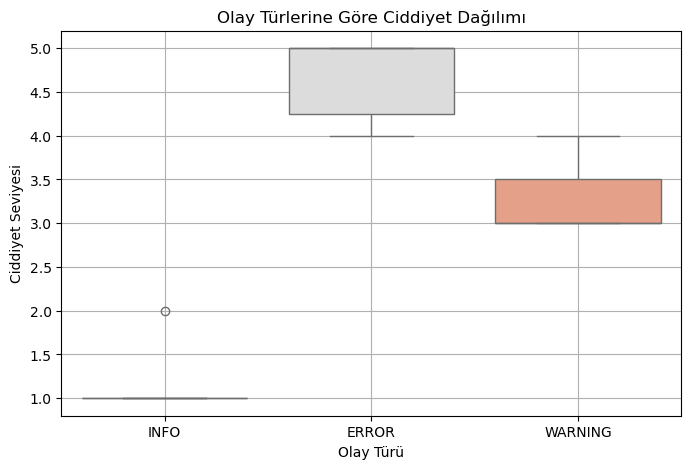

In [10]:
# 7. Olayların Ciddiyetine (Severity) Göre Analiz
plt.figure(figsize=(8, 5))
sns.boxplot(x='event_type', y='severity', data=df, palette='coolwarm')
plt.title('Olay Türlerine Göre Ciddiyet Dağılımı')
plt.xlabel('Olay Türü')
plt.ylabel('Ciddiyet Seviyesi')
plt.grid(True)
plt.show()


In [11]:

# 8. Olay Türlerine Göre Dağılım - Pasta Grafiği
event_counts = df['event_type'].value_counts()

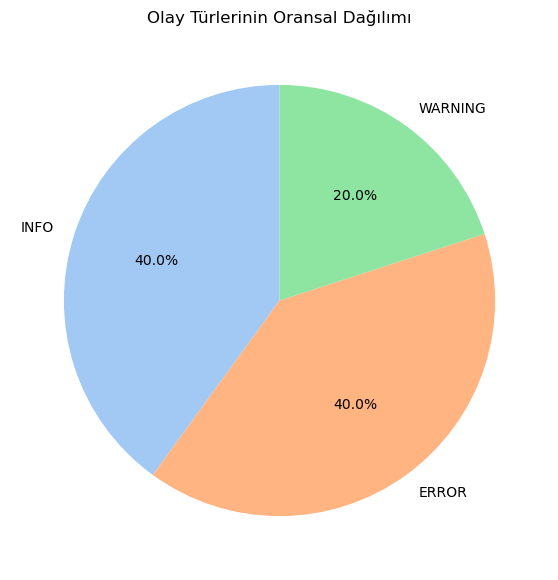

In [12]:
plt.figure(figsize=(7, 7))
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Olay Türlerinin Oransal Dağılımı')
plt.show()


C:\Users\EXCALIBUR\AppData\Local\Temp\ipykernel_1948\1867962761.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index('timestamp')['severity'].resample('H').mean().plot(marker='o', linestyle='-', color='purple')


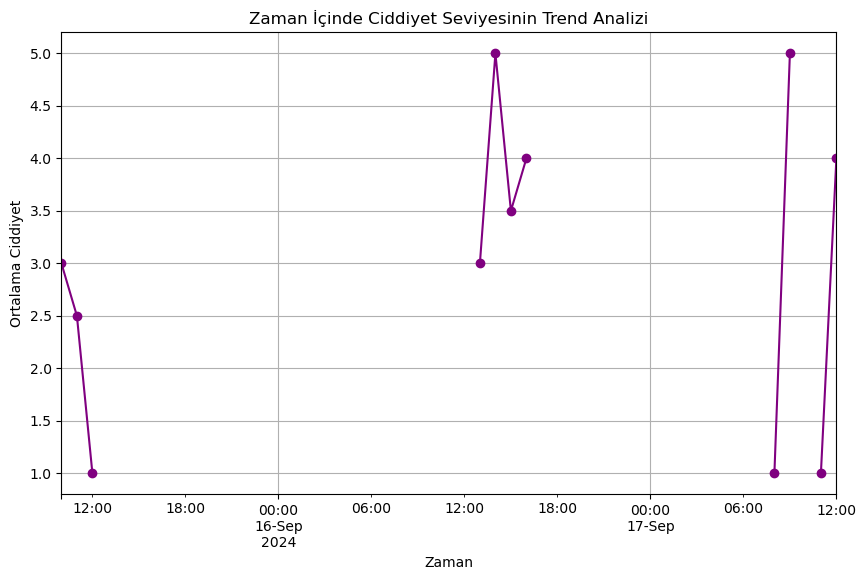

In [13]:
# 9. Ciddiyet Seviyesine Göre Olayların Trend Analizi
plt.figure(figsize=(10, 6))
df.set_index('timestamp')['severity'].resample('H').mean().plot(marker='o', linestyle='-', color='purple')
plt.title('Zaman İçinde Ciddiyet Seviyesinin Trend Analizi')
plt.xlabel('Zaman')
plt.ylabel('Ortalama Ciddiyet')
plt.grid(True)
plt.show()


In [14]:
# 10. Log Verilerini Analiz Etmek için Fonksiyonlar
def analyze_errors(df):
    error_logs = df[df['event_type'] == 'ERROR']
    print("\nHata Olaylarının Detayları:")
    print(error_logs[['timestamp', 'message', 'severity']])

def detect_anomalies(df, threshold=4):
    anomalies = df[df['severity'] >= threshold]
    print("\nAnormal Olaylar (Ciddiyet Seviyesi 4 ve Üzeri):")
    print(anomalies[['timestamp', 'event_type', 'message', 'severity']])


In [15]:
# 11. Fonksiyonları Kullanarak Analiz Yapma
analyze_errors(df)
detect_anomalies(df, threshold=4)


Hata Olaylarının Detayları:
             timestamp               message  severity
1  2024-09-15 10:20:35   Unauthorized access         5
4  2024-09-15 11:20:35  Memory leak detected         4
7  2024-09-16 14:05:32   Unauthorized access         5
9  2024-09-16 15:18:45          Disk failure         5
12 2024-09-17 09:12:22   Unauthorized access         5
14 2024-09-17 12:15:20  Memory leak detected         4

Anormal Olaylar (Ciddiyet Seviyesi 4 ve Üzeri):
             timestamp event_type               message  severity
1  2024-09-15 10:20:35      ERROR   Unauthorized access         5
4  2024-09-15 11:20:35      ERROR  Memory leak detected         4
7  2024-09-16 14:05:32      ERROR   Unauthorized access         5
9  2024-09-16 15:18:45      ERROR          Disk failure         5
10 2024-09-16 16:25:37    WARNING       Memory overload         4
12 2024-09-17 09:12:22      ERROR   Unauthorized access         5
14 2024-09-17 12:15:20      ERROR  Memory leak detected         4
